## Diabetes Predictions

In [4]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt 
%matplotlib inline

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
df = load_diabetes()

In [3]:
print(df["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
## Independent features 
X =pd.DataFrame(df.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
## dependent features 
y = df['target']

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [34]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor()

In [35]:
treeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred = treeRegressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-0.11867405834641165
65.57894736842105
7078.601503759399


In [38]:
X_test.corr

<bound method DataFrame.corr of           age       sex       bmi  ...        s4        s5        s6
119  0.016281 -0.044642 -0.047163  ... -0.039493  0.027364  0.027917
207  0.009016 -0.044642  0.045529  ... -0.039493  0.046133  0.036201
236  0.027178 -0.044642  0.006728  ...  0.034309  0.040673  0.011349
288  0.070769  0.050680 -0.016984  ... -0.002592 -0.070209 -0.017646
174  0.016281  0.050680  0.009961  ... -0.039493  0.017036  0.007207
..        ...       ...       ...  ...       ...       ...       ...
110  0.041708  0.050680 -0.032073  ... -0.039493 -0.126097  0.015491
226 -0.103593  0.050680 -0.046085  ... -0.039493 -0.039809 -0.054925
105  0.023546  0.050680 -0.032073  ... -0.002592 -0.010903  0.019633
192  0.056239  0.050680 -0.030996  ... -0.039493 -0.029526 -0.059067
276  0.012648 -0.044642  0.026128  ... -0.002592  0.057573 -0.021788

[133 rows x 10 columns]>

<Axes: >

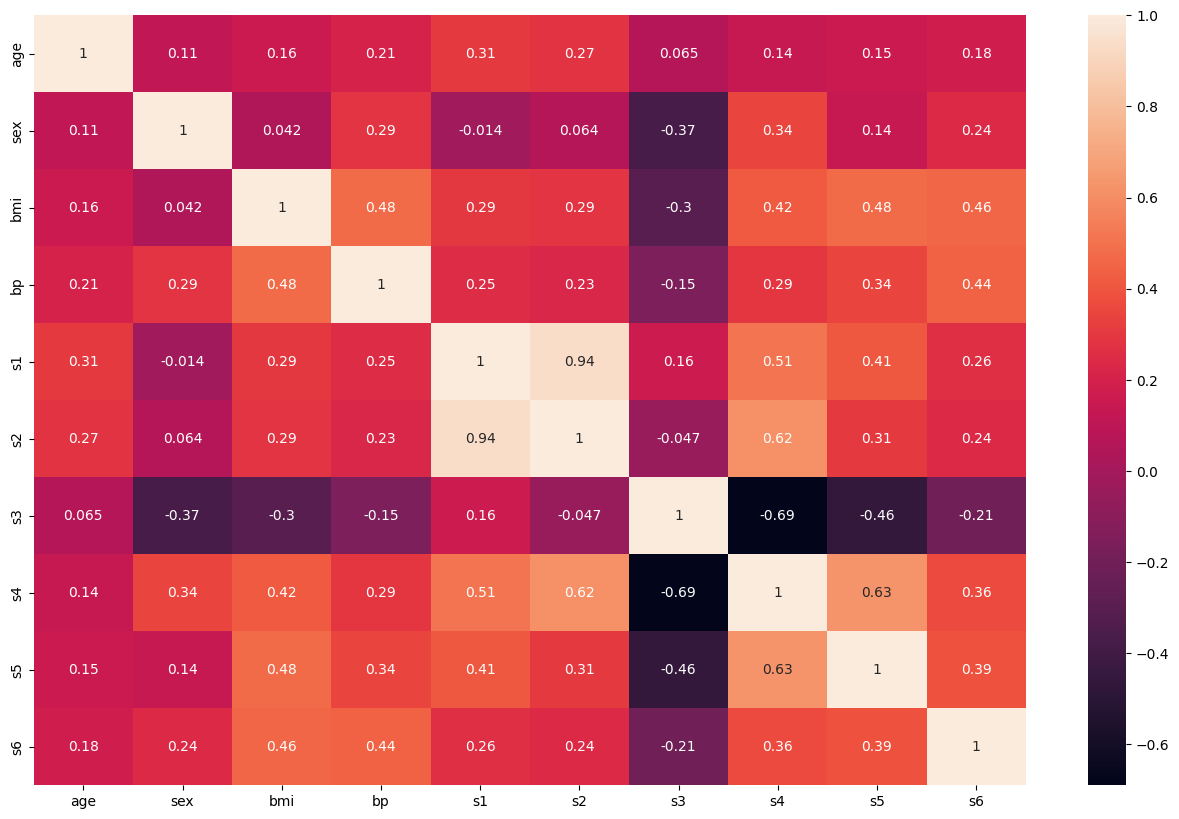

In [39]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(X_test.corr() ,annot=True)

## Hpyer Parameter Tuning

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [41]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [42]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [43]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=regressor,param_grid=param,cv=5,scoring='accuracy')

In [44]:
grid.fit(X_train,y_train)

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [45]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'log2',
 'splitter': 'random'}

In [46]:
y_pred = grid.predict(X_test)

In [47]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.015052938272033689
63.067669172932334
6232.421052631579


In [50]:
from sklearn.tree import DecisionTreeRegressor
modelselection = DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='best')
modelselection.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.5, 0.9, 'x[2] <= 0.016\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[3] <= 0.003\nfriedman_mse = 3732.377\nsamples = 205\nvalue = 125.498'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= -0.022\nfriedman_mse = 2938.633\nsamples = 135\nvalue = 113.252'),
 Text(0.0625, 0.3, 'x[7] <= 0.031\nfriedman_mse = 1738.614\nsamples = 84\nvalue = 97.929'),
 Text(0.03125, 0.1, 'friedman_mse = 1532.7\nsamples = 76\nvalue = 93.776'),
 Text(0.09375, 0.1, 'friedman_mse = 1974.984\nsamples = 8\nvalue = 137.375'),
 Text(0.1875, 0.3, 'x[7] <= 0.025\nfriedman_mse = 3891.426\nsamples = 51\nvalue = 138.49'),
 Text(0.15625, 0.1, 'friedman_mse = 3123.379\nsamples = 33\nvalue = 117.788'),
 Text(0.21875, 0.1, 'friedman_mse = 3073.247\nsamples = 18\nvalue = 176.444'),
 Text(0.375, 0.5, 'x[7] <= 0.064\nfriedman_mse = 4416.216\nsamples = 70\nvalue = 149.114'),
 Text(0.3125, 0.3, 'x[9] <= 0.051\nfriedman_mse = 3926.643\nsamples = 60\nvalue = 138.083'),
 Text(0.28125

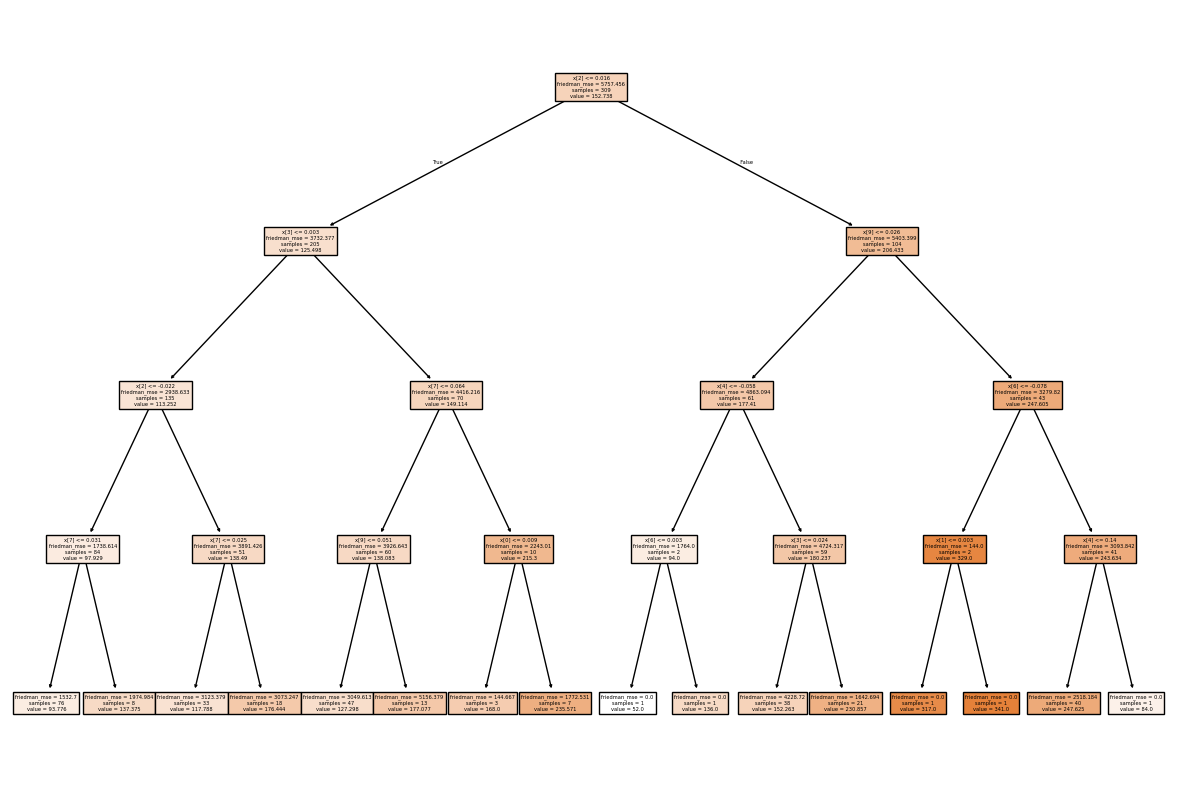

In [51]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(modelselection,filled=True)